<a href="https://colab.research.google.com/github/Meera-Ajay-25/Machine-Learning-projects/blob/main/Student_performance_linear_reg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project** : Predict the percentage of marks of the students based on the number of study hours

**Algorithm Used**: Linear Regression

**Steps**:





Testing the accurcay of the algorithm and constructing confusion matrix

*   Loading the Dataset using Pandas library
*   Preprocessing the dataset


*   Scaling the dataset using MinMax scaler
*   Splitting the dataset


*   Model building using Linear Regression
*   Model evaluation using MSE,MAE,RMSE,R-2 curve







In [1]:
#loading the dataset using pandas library
import pandas as pd
df=pd.read_csv("/content/score.csv")
df

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [5]:
#checking the shape of the dataset
df.shape

(25, 2)

In [4]:
#checking the Data types
df.dtypes

Hours     float64
Scores      int64
dtype: object

In [3]:
#checking the missing values
df.isna().sum()

Hours     0
Scores    0
dtype: int64

In [6]:
#checking for duplicates
df.duplicated().sum()

0

After doing the initial analyses it is understood that, there are **25 rows** and **2 columns**. The independent varible is Hours and the depenedent variable is scores.
There are no missing values and duplicate values in the dataset.

In [8]:
X=df.iloc[:,:-1]
y=df.iloc[:,-1]

In [9]:
#scaling the dataset using MinMax Scaler
from sklearn.preprocessing import MinMaxScaler
ms=MinMaxScaler()
X_sc=ms.fit_transform(X)
X_sc

array([[0.17283951],
       [0.49382716],
       [0.25925926],
       [0.91358025],
       [0.2962963 ],
       [0.04938272],
       [1.        ],
       [0.54320988],
       [0.88888889],
       [0.19753086],
       [0.81481481],
       [0.59259259],
       [0.41975309],
       [0.27160494],
       [0.        ],
       [0.96296296],
       [0.17283951],
       [0.09876543],
       [0.61728395],
       [0.77777778],
       [0.19753086],
       [0.45679012],
       [0.33333333],
       [0.71604938],
       [0.82716049]])

In [10]:
#train-test-split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X_sc,y,test_size=0.3,random_state=0)

In [11]:
#model building using linear regression
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [12]:
#prediction
y_pred=lr.predict(X_test)
y_pred

array([17.05366541, 33.69422878, 74.80620886, 26.8422321 , 60.12335883,
       39.56736879, 20.96909209, 78.72163554])

In [13]:
y_test.values

array([20, 27, 69, 30, 62, 35, 24, 86])

In [14]:
#comparing actual values and predicted values
Result=pd.DataFrame({'Actual values':y_test,'Predicted values':y_pred})
Result

,Actual values,Predicted values
5,20,17.053665
2,27,33.694229
19,69,74.806209
16,30,26.842232
11,62,60.123359
22,35,39.567369
17,24,20.969092
24,86,78.721636


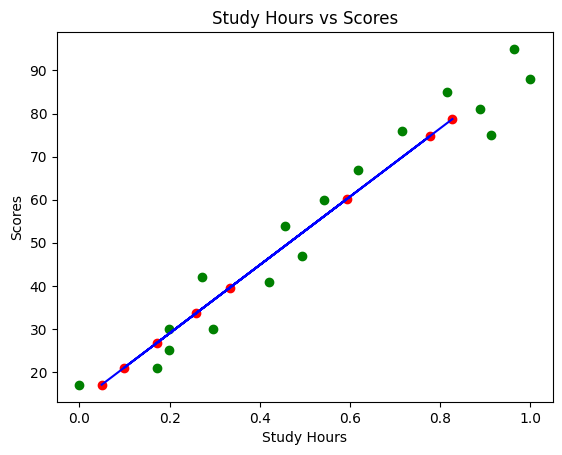

In [17]:
#Visualising using scatter plot
import matplotlib.pyplot as plt
plt.scatter(X_train,y_train,color="green")
plt.plot(X_test,y_pred,color="blue")
plt.scatter(X_test,y_pred,color="red")
plt.title('Study Hours vs Scores')
plt.xlabel("Study Hours")
plt.ylabel("Scores")
plt.show()

In [18]:
print("slope:",lr.coef_)
print("y intercept:",lr.intercept_)

slope: [79.28739016]
y intercept: 13.138238737765839


In [19]:
from sklearn.metrics import mean_absolute_error,mean_squared_error, r2_score
import numpy as np
print("mean absolute error:",mean_absolute_error(y_test,y_pred))
print("mean squared error:",mean_squared_error(y_test,y_pred))
print("root mean squared error:",np.sqrt(mean_squared_error(y_test,y_pred)))
print("r2-score:",r2_score(y_test,y_pred))

mean absolute error: 4.419727808027649
mean squared error: 22.965097212700407
root mean squared error: 4.792191274636313
r2-score: 0.9568211104435258


In [20]:
import warnings
warnings.filterwarnings('ignore')
y_new=lr.predict(ms.transform([[9.5]]))
y_new

array([95.36219891])